# Graphormer论文笔记（一）
> 文章地址：https://arxiv.org/pdf/2106.05234v5.pdf
Github项目地址：https://github.com/microsoft/Graphormer
OGB数据地址：https://ogb.stanford.edu/
一段话总结：**该论文使用了基于transformer的注意力机制，推广到graph领域（基本上将gnn问题转化为了一个序列问题）作者使用了几个创新性的bias将图结构特征融入到注意力中，这种添加bias的融入方式跟我自己想到的方式相似性非常高，感觉这种思路是从SwinTransformer一脉相承的，只要了解一些图论的知识外加学习过SwinTransformer的bias的编码方式该论文的实现方式还是很容易想到的。我们看到作者也是微软亚研院的，这也印证了之前的猜想，虽然作者可能和swin的作者不是一伙人但人家都是一个单位的，不仅感慨我要是早一年就学习这个领域是不是也能和微软亚研院掰掰腕子......**


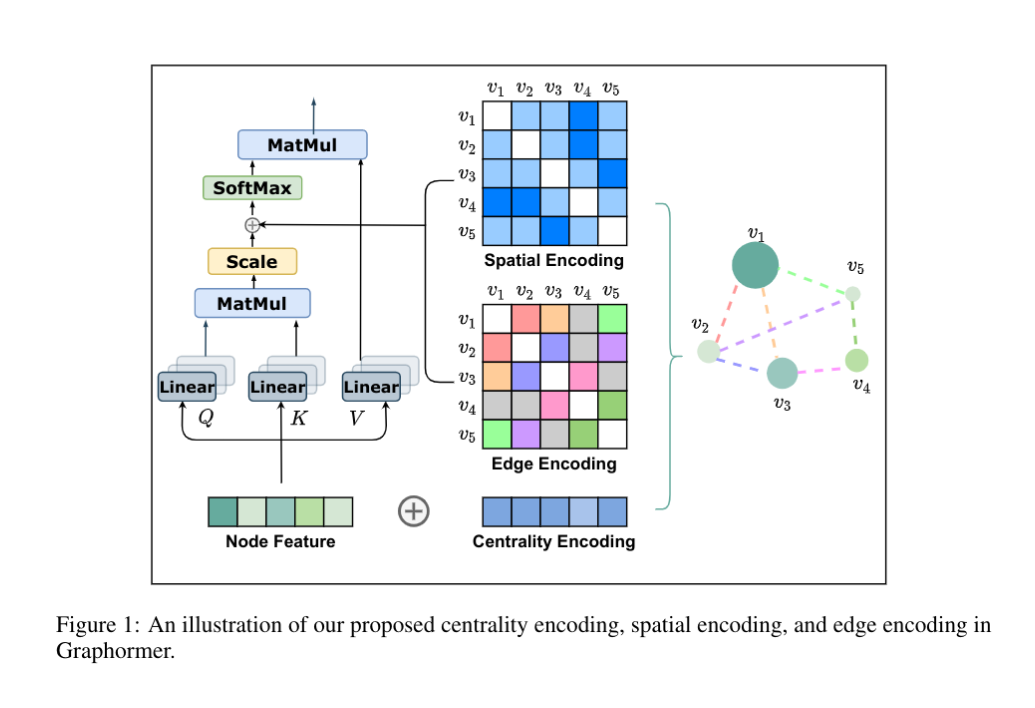

### 1、问题背景：
随着transformer的优越性能在各种领域都爆发出强势的能力，在GNN领域很多研究人员也不甘寂寞，纷纷开始了对transformer结构的魔改，以至于能适用于图结构的任务。其实在本文介绍的这篇论文之前就已经有很多将基于transformer的架构改到gnn任务中，效果并没有达到预期（像cv领域的改装那么强势），但是本篇论文的出现稍稍缓解了这种颓势，在OGB（Open Graph Benchmark，图ML问题的开源大型数据集）数据集上在几个任务取得了不错的成绩，标志着gnn转化成transformer问题乃至于序列问题都是完全可行的。


### 2、Structural Encodings in Graphormer：
graphormer与其他图领域的transformer的创新点是引入了三种图结构相关的bias编码，如上图所示。
- Centrality Encoding：将节点度的信息编码融入到transformer架构中，类似于绝对位置编码的嵌入方式，这里需要注意的是如果有向图则需要区分入度和出度，计算公式如下：
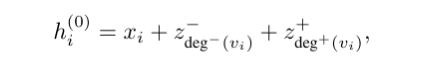

- Spatial Encoding：将最短距离矩阵融入到transformer中的注意力机制中，可以简单的认为，节点到节点的最短距离影响了节点之间的相关性，例如对最短距离学习到一个负相关性的映射那么节点i与节点j最短距离较小的话那么这两个节点之间的bias就会变大，得到的注意力系数就会相应变大。这里的编码方式与上面的度的编码方式不同，上一个中心度编码是将每个节点的度直接分别映射成和输入特征维度相同的向量，并与输入特征相加，这种方法和Bert、Vit等嵌入方式相同；而Spatial Encoding则是先计算出最短距离矩阵，将计算出来的矩阵通过编码加入到qk相关性矩阵中，计算公式如下：
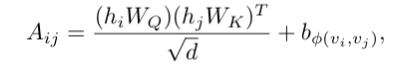

- Edge Encoding in the Attention：由于有些图任务中边的属性也不同，作者将边的信息也嵌入到注意力中，这里对于边的编码方式是寻找节点之间最短距离经过的其中一条路径，将该路径上所有边的属性（向量）映射成一维的标量在求均值加到对应的qk相关性矩阵计算注意力系数，具体计算公式如下：
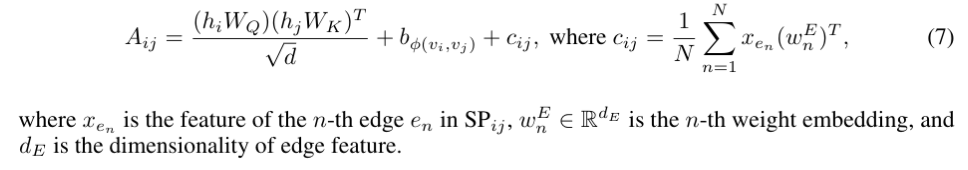

### 3、总结：
Graphormer问题其实就是上述的三个bias的编码的嵌入问题，其他的内容基本就是transformer的结构，具体的代码和实现方式下一篇分析。我个人对该模型的理解是由于完全转化为了序列问题，之前gnn的人工计算的很多算法都可以看成一种强归纳偏置，transformer架构之所以鲁棒性好泛化能力强就是舍弃了一些人工规定的归纳偏置，其实本论文的编码嵌入方式也是一种很强的先验，图结构中节点之间的相互联系一定程度也是由节点本身的属相来决定的，或许随着数据集的增大，去掉一些偏好性特别强的先验假设仅依靠transformer的学习能力可以学习到节点之间的有关图结构的相关性，总的来说图领域的数据集还是相对于nlp或cv太小了。除此之外在cv领域多尺度一直是一个比较重要的模型特性，可以使模型不同层学的感受野不尽相同，有一个从局部到整体的过程，接下来可以尝试更改编码嵌入的不同层次特点实现类似多尺度的效果。